## 1. Import Libraries & Load Data

In [1]:
# 1. Import Libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Add custom scripts to Python path
sys.path.append(os.path.abspath('../scripts'))  # Adjust if your structure differs

# 3. Import custom modules
from data_loader import load_creditcard_data
from preprocessing import clean_creditcard_data

# 4. Load and clean credit card dataset
CLEANED_DATA_PATH = '../data/processed/creditcard_cleaned.csv'
RAW_DATA_PATH = '../data/raw/creditcard.csv'

# If cleaned file exists, load it directly; otherwise, load + clean raw
if os.path.exists(CLEANED_DATA_PATH):
    credit_df = load_creditcard_data(CLEANED_DATA_PATH)
else:
    raw_df = load_creditcard_data(RAW_DATA_PATH)
    credit_df = clean_creditcard_data(raw_df)
    credit_df.to_csv(CLEANED_DATA_PATH, index=False)

ModuleNotFoundError: No module named 'data_loader'

## 2. Understand Dataset Structure
* Check number of rows, columns, datatypes, missing values.

* Note that Time, Amount, Class are important columns.

* V1 to V28 are anonymized PCA features.

In [ ]:
credit_df.info()
credit_df.head()
credit_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3. Target Variable Distribution (Class Imbalance)
*  visualize and quantify imbalance in target variable

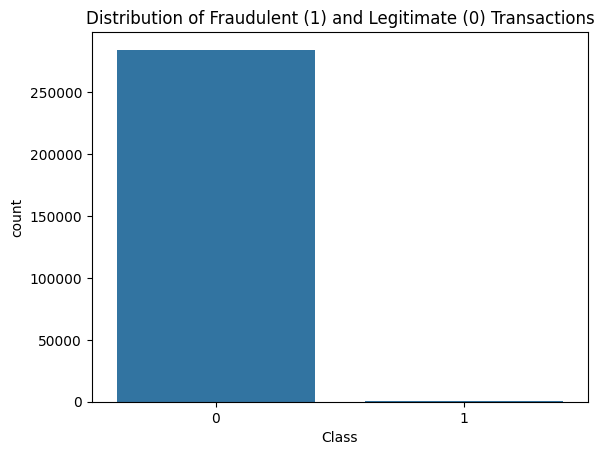

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='Class', data=credit_df)
plt.title('Distribution of Fraudulent (1) and Legitimate (0) Transactions')
plt.savefig('../figures/creditcard_class_distribution.png')
plt.show()

print(credit_df['Class'].value_counts(normalize=True))

## 4. Transaction Amount Analysis
* Check distribution of transaction amounts, which may help distinguish fraud.

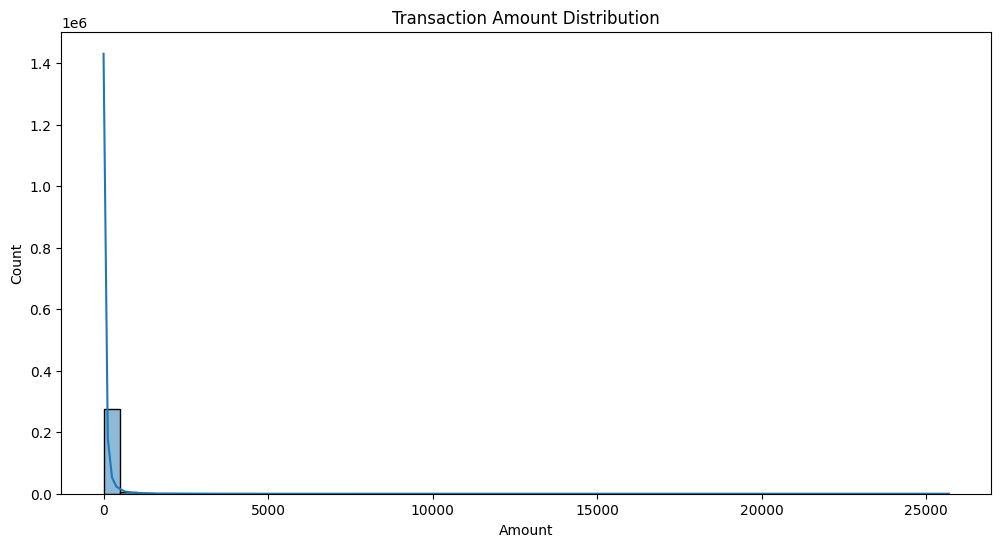

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=credit_df, x='Amount', bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.savefig('../figures/transaction_amount_distribution.png')
plt.show()


## 5. Transaction Time Analysis
* Time is seconds elapsed since first transaction — understand any time patterns.

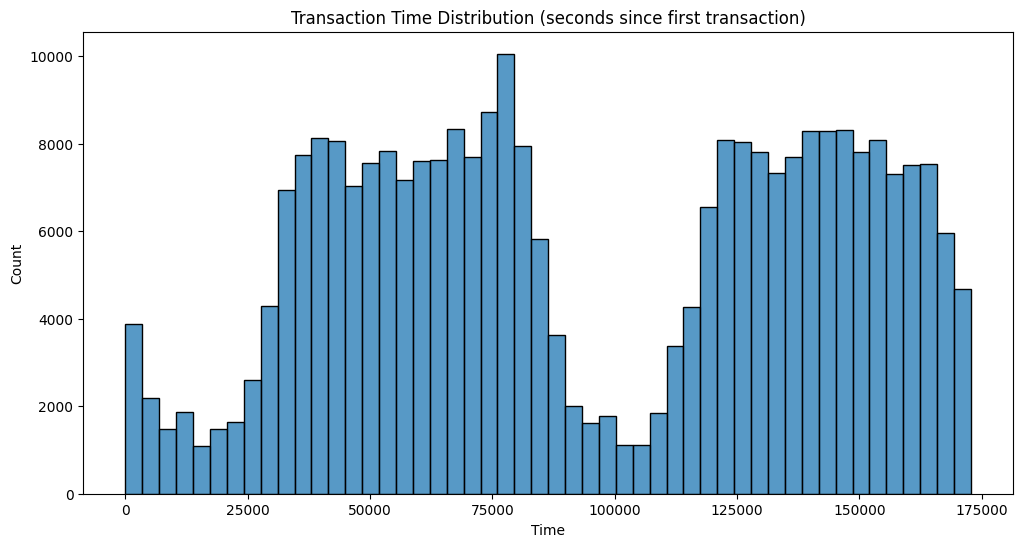

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(credit_df['Time'], bins=50)
plt.title('Transaction Time Distribution (seconds since first transaction)')
plt.savefig('../figures/transaction_time_distribution.png')
plt.show()

## 6. Correlation Matrix
* Helps identify feature relationships, although PCA features may not be intuitive.

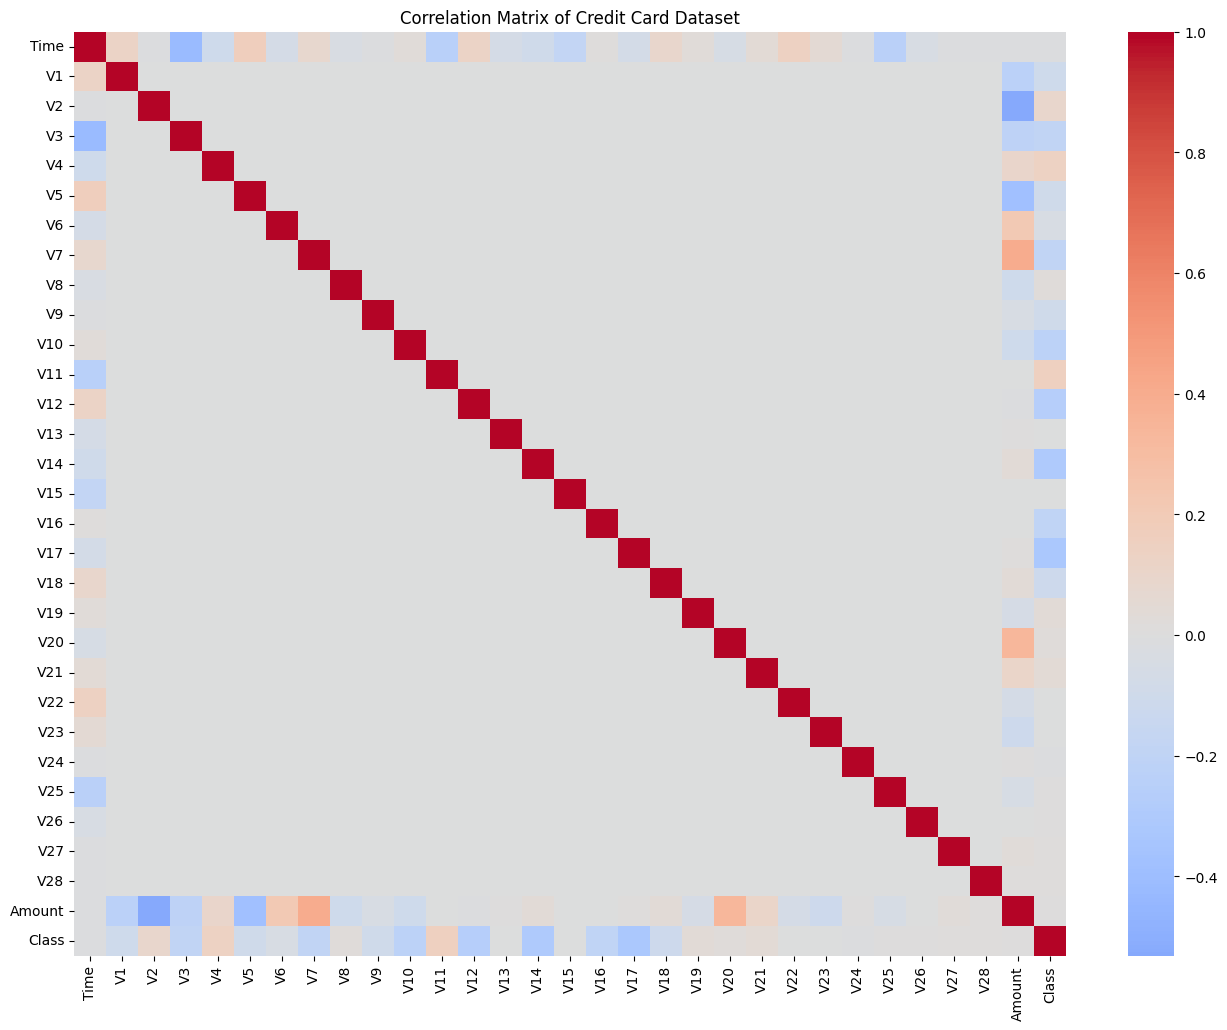

In [ ]:
plt.figure(figsize=(16,12))
corr = credit_df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Credit Card Dataset')
plt.savefig('../figures/creditcard_correlation_matrix.png')
plt.show()


## 7. Fraudulent vs Legitimate Transaction Amounts
* Compare amounts between fraud and non-fraud classes.

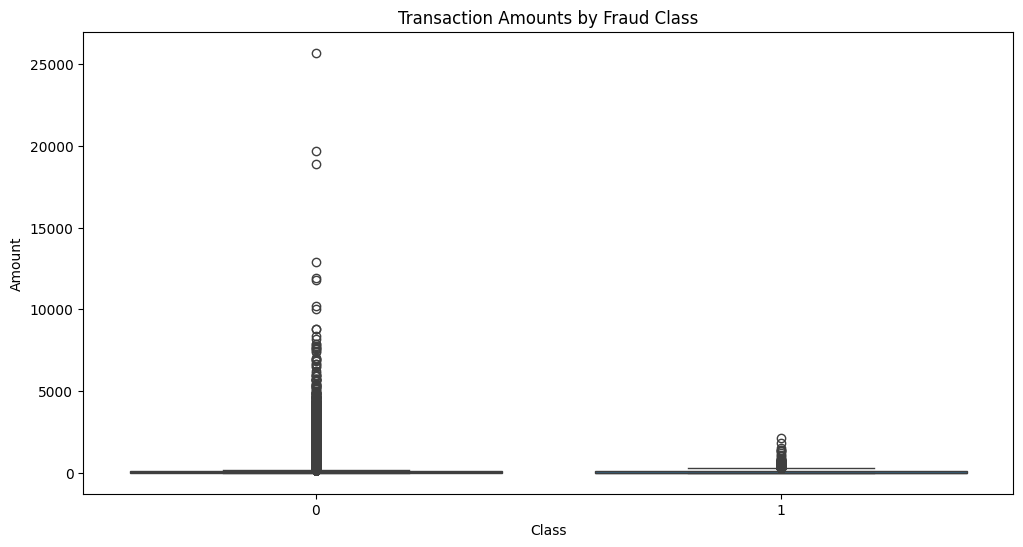

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title('Transaction Amounts by Fraud Class')
plt.savefig('../figures/amount_by_class.png')
plt.show()

## 8.PCA Features Distribution
* Visualize distribution of anonymized features.

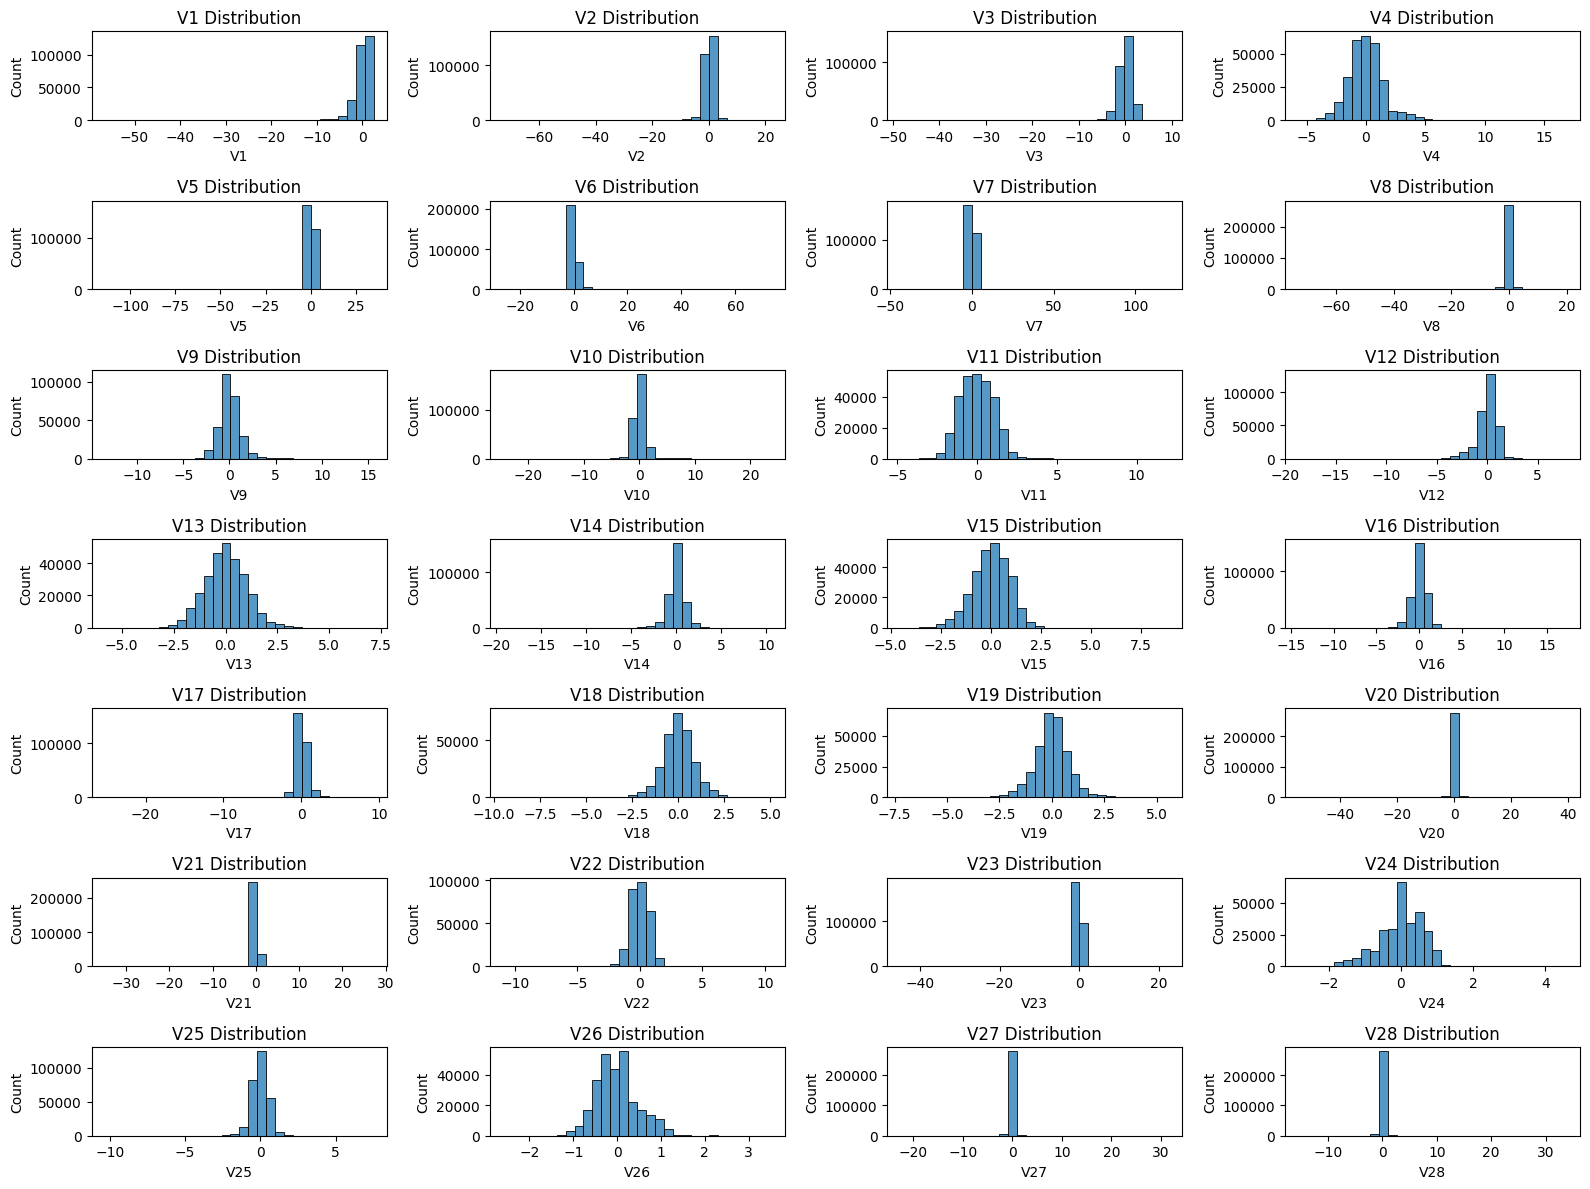

In [ ]:
plt.figure(figsize=(16,12))
for i in range(1, 29):
    plt.subplot(7, 4, i)
    sns.histplot(credit_df[f'V{i}'], bins=30)
    plt.title(f'V{i} Distribution')
plt.tight_layout()
plt.savefig('../figures/pca_features_distribution.png')
plt.show()